In [1]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Creating demo dataset
column1 = np.array([2,4,5,3,6,5,7])
column2 = np.array([35,60,20,50,50,55,60])

In [3]:
vegetable_df = pd.DataFrame({'Weight':column1, 'Price':column2})
vegetable_df.head()

,Weight,Price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50


In [4]:
vegetable_df.shape

(7, 2)

In [5]:
vegetable_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  7 non-null      int32
 1   Price   7 non-null      int32
dtypes: int32(2)
memory usage: 188.0 bytes


<br><br>
## Task 01: Manual calculation of Coefficient and Intercept

In [6]:
# mean of both columns
weight_mean = vegetable_df['Weight'].mean()
price_mean = vegetable_df['Price'].mean()

dev_weight = vegetable_df['Weight'] - weight_mean
dev_price = vegetable_df['Price'] - price_mean

### - Calculating Coefficient 
Formula: <br>
<img src='https://img001.prntscr.com/file/img001/8MVRig8ESLKgKazLZzdHhw.png' width='300px'>

In [7]:
m = np.sum(dev_weight*dev_price) / np.sum(dev_weight ** 2)

print('\nCoefficient of vegetable dataset: ', round(m,2))


Coefficient of vegetable dataset:  2.62


### - Calculating Intercept
**Formula:**    <i>c = y - mx</i>


In [8]:
c = price_mean - (m*weight_mean)

print("\nIntercept of vegetable dataset: ", round(c,2))


Intercept of vegetable dataset:  35.16


### - Prediction of weight value 6

In [9]:
# y = mx + c
pred_6 = m*6 + c

print("\nPrice prediction of vegetable weight 6: ", round(pred_6,2))


Price prediction of vegetable weight 6:  50.89


### Using sklearn

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

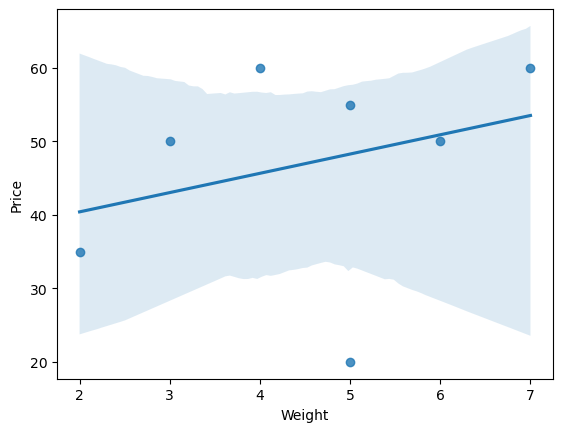

In [11]:
sns.regplot(data=vegetable_df, x='Weight', y='Price')
plt.show()

In [12]:
vegetable_df.corr()

,Weight,Price
Weight,1.000000,0.306795
Price,0.306795,1.000000


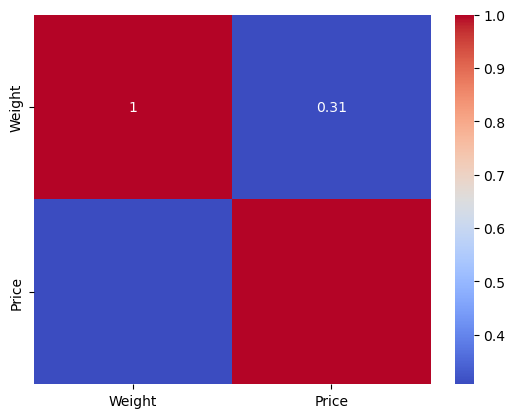

In [13]:
sns.heatmap(data=vegetable_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [14]:
# Implementing everything with sklearn

In [15]:
lin_reg = LinearRegression()

In [16]:
x = vegetable_df[['Weight']]
y = vegetable_df[['Price']]

In [17]:
# fitting data 
lin_reg.fit(x, y)

LinearRegression()

### Coeffiecent and Inercept

In [18]:
print(f'Coefficient of vegetable dataset: {lin_reg.coef_}\nIntercept of vegetable dataset: {lin_reg.intercept_}')

Coefficient of vegetable dataset: [[2.62096774]]
Intercept of vegetable dataset: [35.16129032]


#### Predicting weight value 6 with sklearn model

In [19]:
pred_6_2 = lin_reg.predict([[6]])
print("\nPrice prediction results of vegetable weight 6: ", round(pred_6_2[0,0],2))


Price prediction results of vegetable weight 6:  50.89


<br><br> 
#### Comparison with previous results

In [20]:
print('Manual Calculation Results: ', (m,c))
print('SKLearn Calculation Results: ',(lin_reg.coef_[0,0], lin_reg.intercept_[0]))
print('\nManual Calculation Prediction Results: ',round(pred_6,2))
print('SKLearn Calculation Prediction Results: ',round(pred_6_2[0,0],2))

Manual Calculation Results:  (2.620967741935484, 35.16129032258065)
SKLearn Calculation Results:  (2.620967741935484, 35.16129032258065)

Manual Calculation Prediction Results:  50.89
SKLearn Calculation Prediction Results:  50.89


<br><br>
## Task 02: Compute the residuals for each data point.

In [21]:
vegetable_df['Predicted_Price'] = lin_reg.predict(vegetable_df[['Weight']])

In [22]:
vegetable_df['Residuals'] = vegetable_df['Price'] - vegetable_df['Predicted_Price']

In [23]:
vegetable_df.head()

,Weight,Price,Predicted_Price,Residuals
0,2,35,40.403226,-5.403226
1,4,60,45.645161,14.354839
2,5,20,48.266129,-28.266129
3,3,50,43.024194,6.975806
4,6,50,50.887097,-0.887097


## Task 03: Calculating MSE, MAE and RSE

In [24]:
mse = mean_squared_error( vegetable_df['Price'] , vegetable_df['Predicted_Price'])
mae = mean_absolute_error(vegetable_df['Price'] , vegetable_df['Predicted_Price'])
rse = np.sqrt(mae)
print(f'\nMSE: {mse}\nMAE: {mae}\nRSE: {rse}')


MSE: 167.30990783410135
MAE: 9.87327188940092
RSE: 3.1421762982685935


### Best Fit line

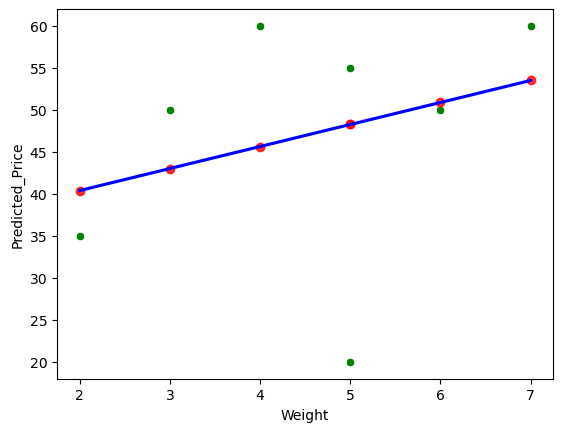

In [25]:
sns.scatterplot(data=vegetable_df, x='Weight', y='Price', color='green')
sns.regplot(data=vegetable_df, x='Weight', y="Predicted_Price", color='red', line_kws={'color': 'blue'},)

plt.show()

## Final Task: Exporting dataframe to an Excel file

In [26]:
vegetable_df.to_excel('Vegetable_Price_Prediction.xlsx', index=False)